In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('/workspaces/spotify-churn-analysis/data/spotify_churn_dataset.csv')
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


In [31]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
user_id,8000.0,4000.50,2309.55,1.0,2000.75,4000.5,6000.25,8000.0
age,8000.0,37.66,12.74,16.0,26.00,38.0,49.00,59.0
listening_time,8000.0,154.07,84.02,10.0,81.00,154.0,227.00,299.0
songs_played_per_day,8000.0,50.13,28.45,1.0,25.00,50.0,75.00,99.0
skip_rate,8000.0,0.30,0.17,0.0,0.15,0.3,0.45,0.6
ads_listened_per_week,8000.0,6.94,13.62,0.0,0.00,0.0,5.00,49.0
offline_listening,8000.0,0.75,0.43,0.0,0.00,1.0,1.00,1.0
is_churned,8000.0,0.26,0.44,0.0,0.00,0.0,1.00,1.0


In [44]:
df['device_type'].value_counts()

device_type
Desktop    2778
Web        2623
Mobile     2599
Name: count, dtype: int64

In [45]:
df['subscription_type'].value_counts()

subscription_type
Premium    2115
Free       2018
Student    1959
Family     1908
Name: count, dtype: int64

Divide customers into age groups

In [32]:
df['age_group'] = pd.cut(df['age'], bins=[0,18,60,100], labels=['Young','Adult','Senior'])

In [33]:
df['age_group'].value_counts()

age_group
Adult     7466
Young      534
Senior       0
Name: count, dtype: int64

In [34]:
df[df.duplicated()]

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,age_group


There're no duplicates

In [35]:
df = df.drop(columns=['user_id'])

In [50]:
df['is_churned'].mean()

np.float64(0.258875)

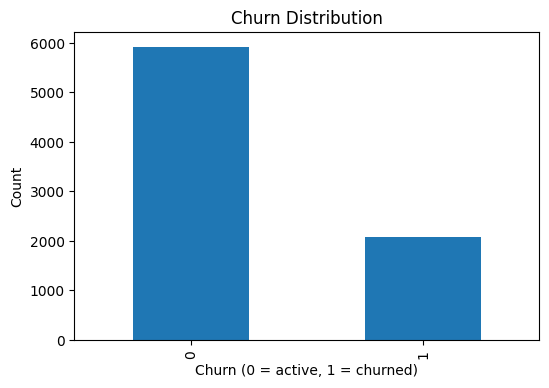

In [ ]:
plt.figure(figsize=(6,4))
df['is_churned'].value_counts().plot(kind='bar')
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = active, 1 = churned)")
plt.ylabel("Count")
plt.show()

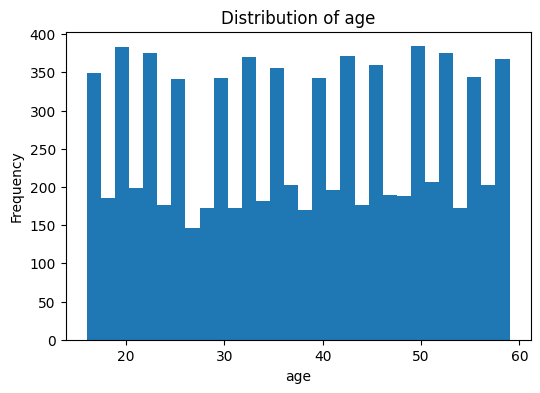

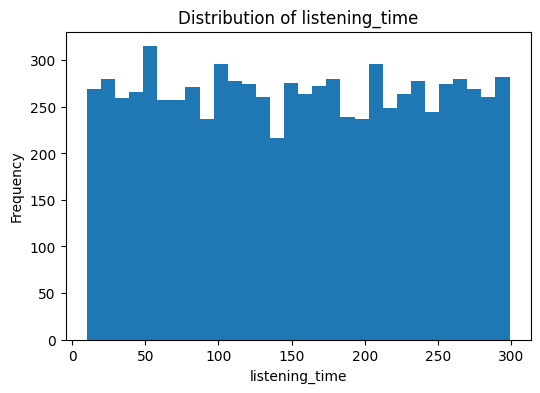

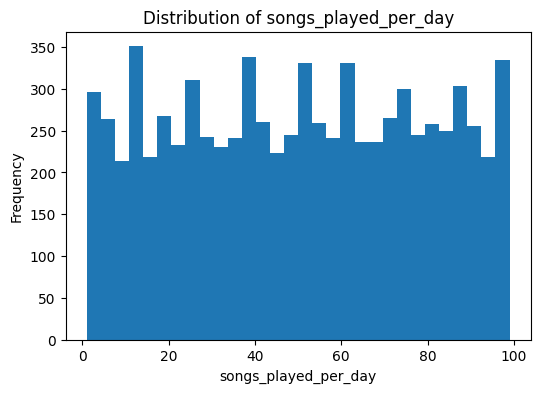

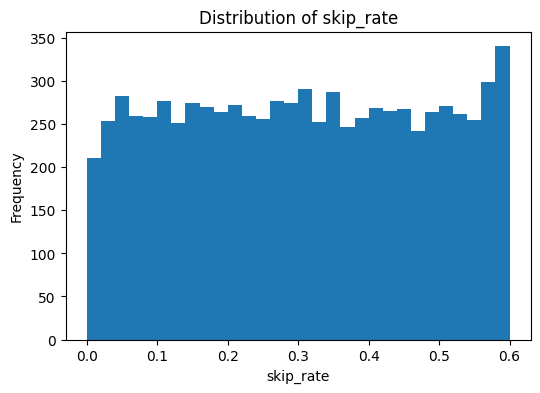

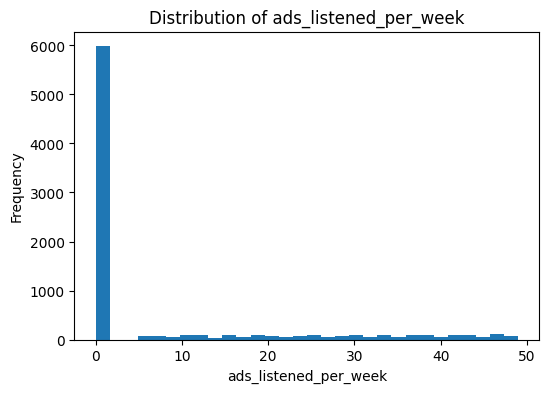

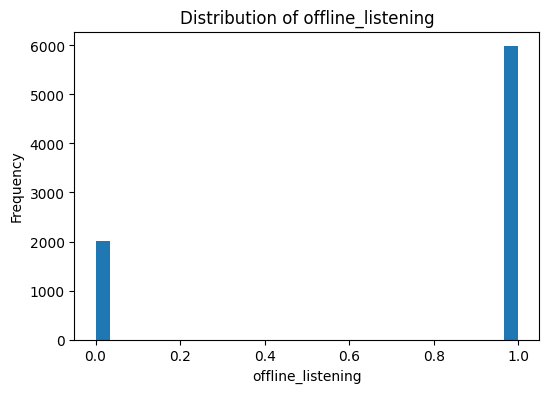

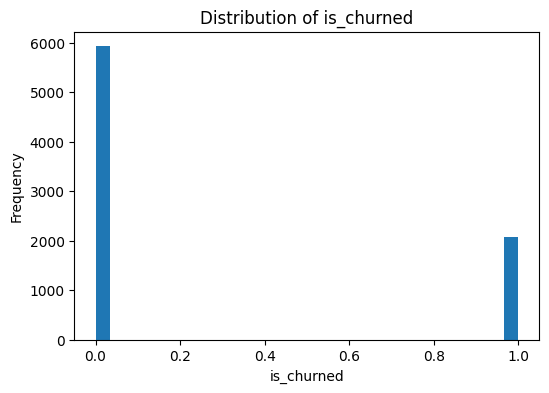

In [37]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


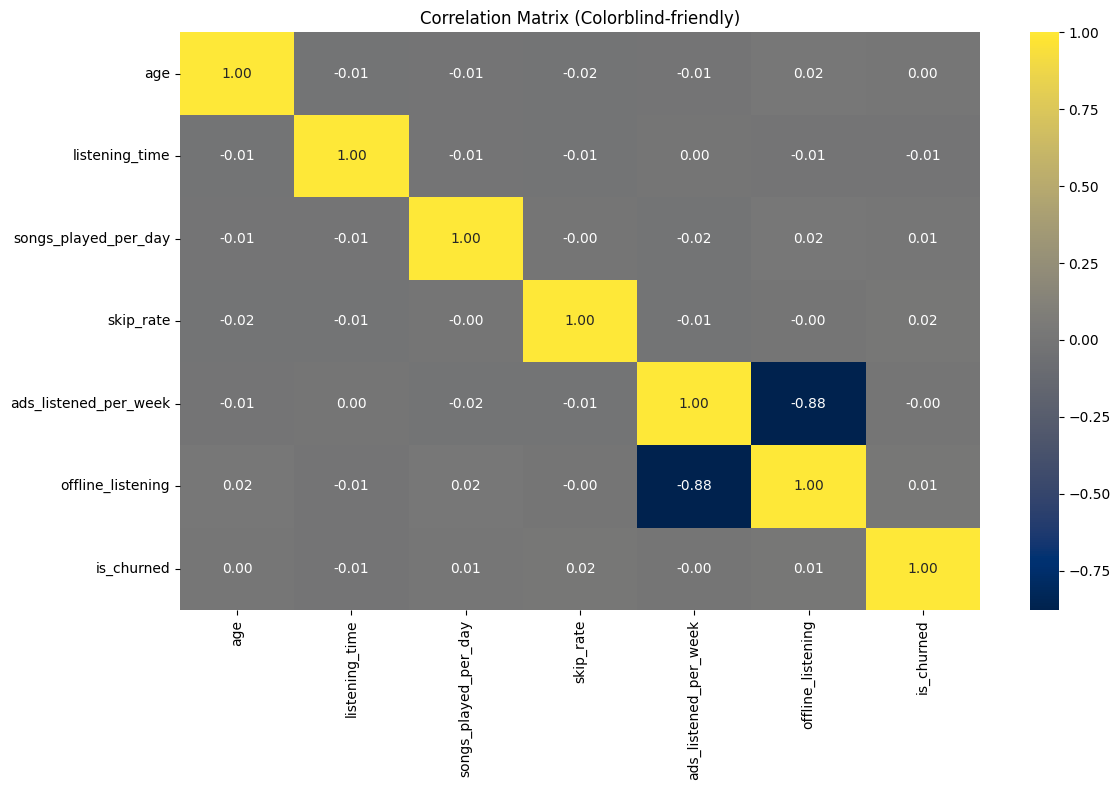

In [38]:
# compute correlation matrix for numerical features and plot it
corr = df[numerical_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(
    corr,                  
    annot=True,            
    fmt=".2f",             
    cmap="cividis",        
    cbar=True              
)
plt.title("Correlation Matrix (Colorblind-friendly)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


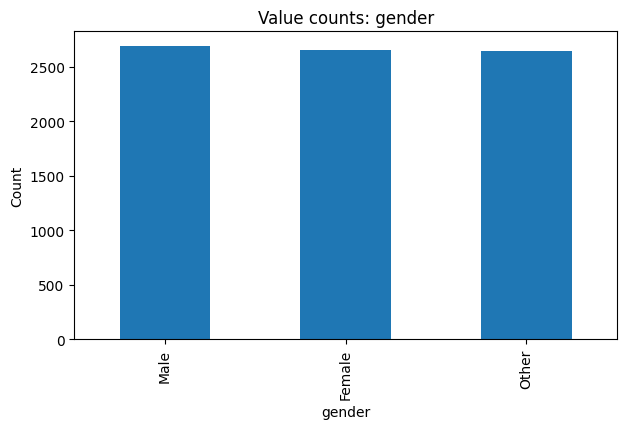

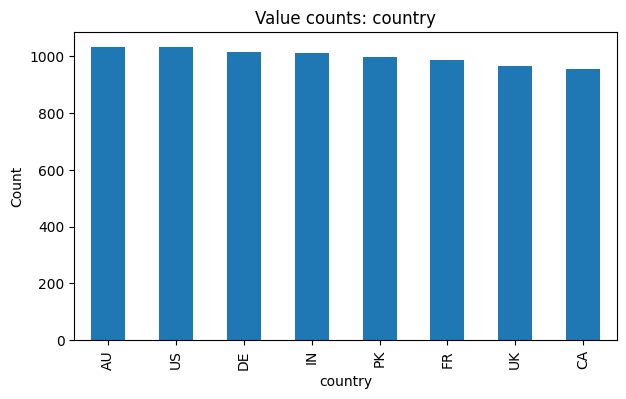

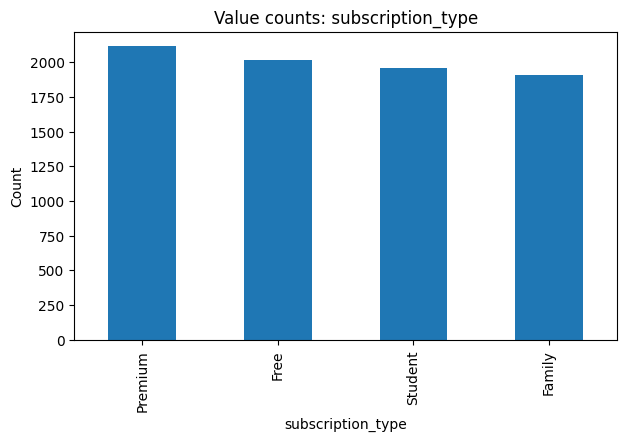

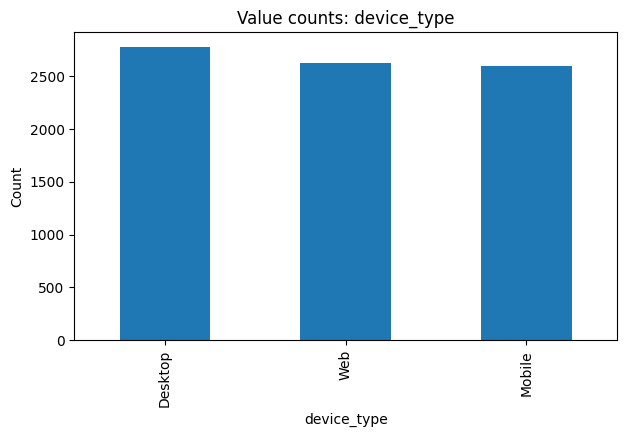

In [39]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(7,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Value counts: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


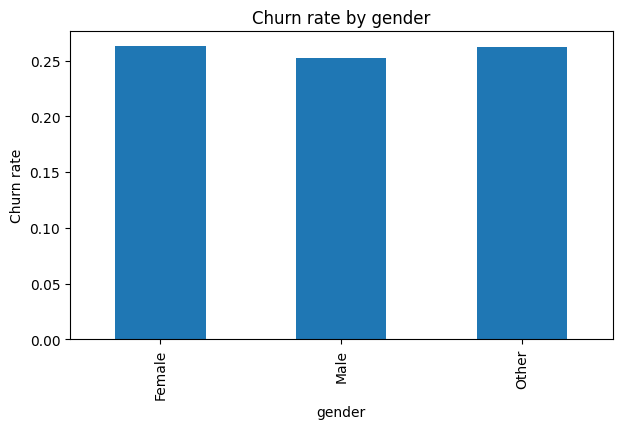

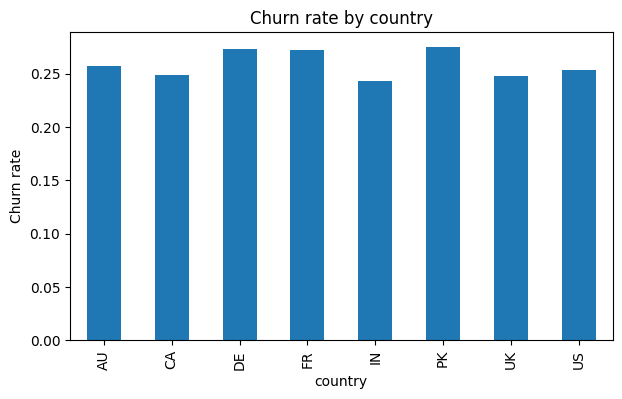

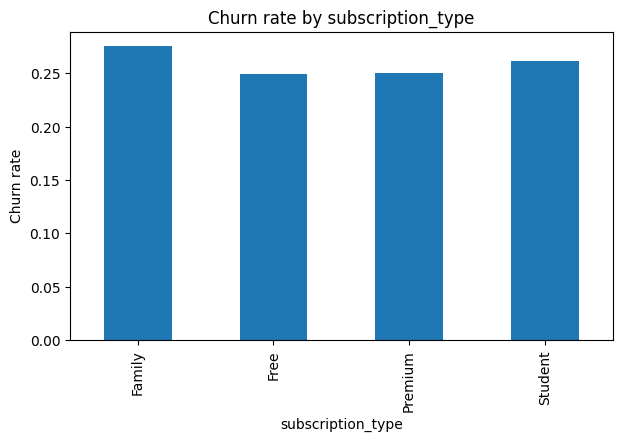

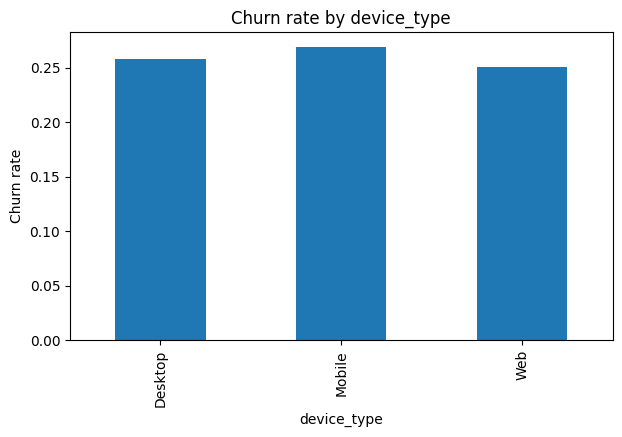

In [40]:
for col in categorical_cols:
    plt.figure(figsize=(7,4))
    churn_rate = df.groupby(col)['is_churned'].mean()
    churn_rate.plot(kind='bar')
    plt.title(f"Churn rate by {col}")
    plt.ylabel("Churn rate")
    plt.xlabel(col)
    plt.show()


In [41]:
corr_with_churn = df[numerical_cols].corrwith(df['is_churned'])

corr_with_churn_df = corr_with_churn.reset_index()
corr_with_churn_df.columns = ['Feature', 'Correlation_with_Churn']

corr_with_churn_df = corr_with_churn_df.sort_values(by='Correlation_with_Churn', ascending=False)

corr_with_churn_df

,Feature,Correlation_with_Churn
6,is_churned,1.000000
3,skip_rate,0.016121
5,offline_listening,0.012754
2,songs_played_per_day,0.009314
0,age,0.003982
4,ads_listened_per_week,-0.002279
1,listening_time,-0.007624
